[View in Colaboratory](https://colab.research.google.com/github/bhawmik/Chatbot/blob/master/3Layer_Conversation_Chat.ipynb)

In [1]:
from __future__ import print_function
import os
import json
import numpy as np
import pandas as pd
#from gensim import corpora, models, similarities
import pickle
from keras.models import Model
from keras.layers import Input, LSTM, Dense
import nltk
nltk.download('punkt')

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
#!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
#!apt-get update -qq 2>&1 > /dev/null
#!apt-get -y install -qq google-drive-ocamlfuse fuse
!wget https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!dpkg -i google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!apt-get install -f
!apt-get -y install -qq fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
--2018-10-23 15:21:48--  https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
Resolving launchpad.net (launchpad.net)... 91.189.89.223, 91.189.89.222
Connecting to launchpad.net (launchpad.net)|91.189.89.223|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://launchpadlibrarian.net/386846978/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb [following]
--2018-10-23 15:21:49--  https://launchpadlibrarian.net/386846978/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
Resolving launchpadlibrarian.net (launchpadlibrarian.net)... 91.189.89.228, 91.189.89.229
Connecting to launchpadlibrarian.net (launchpadlibrarian.net)|91.189.89.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1232624 (1.2M) [application/x-debian-package]
Saving to: ‘google-drive-ocamlfuse_

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [2]:
!ls drive/ml_apps

ben.odt			 fra.txt		s2s_bengali.h5
ben.txt			 LSTM0500.h5		s2s_chat.h5
chat_decoder_model.h5	 LSTM1000.h5		s2s.h5
chat_encoder_model.h5	 LSTM1500.h5		texts.txt
conversation_2.json	 LSTM2000.h5		user_input.txt
conversation.json	 movie_lines_df.pickle
embeddings_index.pickle  s2s_3L_chat.h5


In [0]:
import pickle
glove_embeddings = pickle.load( open( "drive/ml_apps/embeddings_index.pickle", "rb" ) )

In [0]:
file=open('drive/ml_apps/conversation_2.json');
data = json.load(file)
cor=data["conversations"];


In [0]:
#dialog_df = dialog_df.replace(np.nan, '', regex=True)

In [0]:
batch_size = 32  # Batch size for training.
epochs = 100  # Number of epochs to train for.
latent_dim = 100  # Latent dimensionality of the encoding space.
num_samples = 5000  # Number of samples to train on.
max_words = 10000  # Number of words in the train set to be used

In [7]:
texts=[]
rlabels=[]


for i in range(len(cor)):
    for j in range(len(cor[i])):
        if j<len(cor[i])-1:
            texts.append(cor[i][j]);
            rlabels.append(cor[i][j+1]);
            print(i,j,cor[i][j])


0 0 Good morning, how are you?
0 1 I am doing well, how about you?
0 2 I'm also good.
0 3 That's good to hear.
0 4 Yes it is.
0 5 What are you doing these days?
0 6 Nothing much., Just fooling around.
0 7 Don't you have a job?
0 8 I am looking for one.
0 9 That's good.
0 10 I know.
0 11 See you later.
1 0 Hello
1 1 Hi
1 2 How are you doing?
1 3 I am doing well.
1 4 That is good to hear
1 5 Yes it is.
1 6 Can I help you with anything?
1 7 Yes, I have a question.
1 8 What is your question?
1 9 Could I borrow a cup of sugar?
1 10 I'm sorry, but I don't have any.
1 11 Thank you anyway
2 0 How are you doing?
2 1 I am doing well, how about you?
2 2 I am also good.
2 3 That's good.
2 4 Why is it good?
2 5 If you are doing well then it is good.
2 6 You think so?
2 7 I sure do
2 8 I differ with you
2 9 You think this is something to differ about?
2 10 You don't think so?
2 11 No I don't.
2 12 I think it is futile to talk to you.
2 13 You have the right to your opinion.
2 14 Of course I do
2 15 

In [8]:
print('text: ', len(texts))
print('labels: ',len(rlabels))

text:  148
labels:  148


In [9]:
texts[3]

"That's good to hear."

In [10]:
rlabels[106]

"Special cases aren't special enough to break the rules."

In [0]:
# batch_size = 64  # Batch size for training.
# epochs = 100  # Number of epochs to train for.
# latent_dim = 100  # Latent dimensionality of the encoding space.
# num_samples = 100000  # Number of samples to train on.
# max_words = 60000  # Number of words in the train set to be used

In [12]:
rlabels[106]

"Special cases aren't special enough to break the rules."

In [0]:
for i in range(len(rlabels)):
  rlabels[i] = 'bol ' + rlabels[i] +' eol'

In [14]:
rlabels[106]

"bol Special cases aren't special enough to break the rules. eol"

In [0]:
max_encoder_seq_length = 20
max_decoder_seq_length = 20

In [0]:
# from nltk.tokenize import TweetTokenizer, sent_tokenize

# tokenizer_words = TweetTokenizer()
#tokens_sentences = tokenizer_words.tokenize(t) for t in nltk.sent_tokenize(texts[107])
#print(tokens_sentences)

In [0]:
tok_in=[]
tok_target=[]

for i in range(len(texts)):
  if (len(nltk.word_tokenize(texts[i].lower())) < max_encoder_seq_length ):
    tok_in.append(nltk.word_tokenize(texts[i].lower()))
    #tok_in.append(tokenizer_words.tokenize(texts[i].lower()))
for i in range(len(rlabels)): 
  if (len(nltk.word_tokenize(texts[i].lower())) < max_decoder_seq_length ):
    tok_target.append(nltk.word_tokenize(rlabels[i].lower()))
    #tok_target.append(tokenizer_words.tokenize(rlabels[i].lower()))

In [0]:

for i in range(len(tok_in)):
  for j in range(len(tok_in[i])):
    if tok_in[i][j] == "n't": 
      tok_in[i][j] = "not"
    if tok_in[i][j] == "'s": 
      tok_in[i][j] = "is"
    if tok_in[i][j] == "'re": 
      tok_in[i][j] = "are"
for i in range(len(tok_target)):
  for j in range(len(tok_target[i])):
    if tok_target[i][j] == "n't": 
      tok_target[i][j] = "not"
    if tok_target[i][j] == "'s": 
      tok_target[i][j] = "is"
    if tok_target[i][j] == "'re": 
      tok_target[i][j] = "are"

In [19]:
tok_target[105][4]

'not'

In [0]:
vocab = set()
input_words = set()
target_words = set()
for i in range(len(tok_in)):
  for word in tok_in[i]:
#     print(word)
    if word not in input_words:
      input_words.add(word)
    if word not in vocab : 
      vocab.add(word)
for i in range(len(tok_target)):
  for word in tok_target[i]:
#     print(word)
    if word not in target_words:
      target_words.add(word)
    if word not in vocab : 
      vocab.add(word)

In [0]:
input_words.add(" ")

In [0]:
target_words.add(" ")

In [0]:
vocab.add(" ")

In [24]:
if "that" in vocab:
  print('found')

found


In [25]:
len(input_words)

252

In [0]:
input_words = sorted(list(input_words))
target_words = sorted(list(target_words))
vocab = sorted(list(vocab))
num_encoder_tokens = len(input_words)
num_decoder_tokens = len(target_words)
num_vocab_tokens = len(vocab)
max_encoder_seq_length = max([len(tok_in[i]) for i in range(len(tok_in))])
max_decoder_seq_length = max([len(tok_target[i]) for i in range(len(tok_target))])

In [27]:
print('Number of samples:', len(texts))
print('Number of unique input/encoder tokens:', num_encoder_tokens)
print('Number of unique output/decoder tokens:', num_decoder_tokens)
print('Number of unique vocab tokens:', num_vocab_tokens)

print('Max sequence length for inputs/encoder:', max_encoder_seq_length)
print('Max sequence length for outputs/decoder:', max_decoder_seq_length)

Number of samples: 148
Number of unique input/encoder tokens: 252
Number of unique output/decoder tokens: 290
Number of unique vocab tokens: 300
Max sequence length for inputs/encoder: 16
Max sequence length for outputs/decoder: 34


In [28]:
count = 0
for i in range(len(tok_in)):
  if len(tok_in[i]) > 35:
    count += 1
    
print("Number of sentences > 40: ", count)

Number of sentences > 40:  0


In [0]:
input_token_index = dict(
    [(char, i) for i, char in enumerate(input_words)])
target_token_index = dict(
    [(char, i) for i, char in enumerate(target_words)])
vocab_token_index = dict(
    [(char, i) for i, char in enumerate(vocab)])

In [30]:
len(input_words)

252

In [0]:
#Generate embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_words,embedding_dim))

#for word, i in input_token_index.items():
for word, i in vocab_token_index.items():
  embedding_vector = glove_embeddings.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector


In [32]:
embedding_matrix[1]

array([ 0.38472   ,  0.49351001,  0.49096   , -1.54340005, -0.33614001,
        0.62220001,  0.32264999,  0.075331  ,  0.65591002, -0.23517001,
        1.21140003,  0.06193   , -0.62004   ,  0.31371   ,  0.38947999,
       -0.24381   , -0.065643  ,  0.58797002, -0.86382002,  0.63165998,
        0.68362999,  0.39647001, -0.62388003, -0.25094   ,  0.92830998,
        1.51520002, -0.43917   ,  0.22249   ,  1.36950004, -0.53097999,
        0.39811   ,  0.77113998,  0.49043   ,  0.58853   ,  0.2376    ,
        0.31619999, -0.011962  , -0.047074  ,  0.34584999, -1.29439998,
        0.18596999,  0.27002001, -0.70602   , -0.20652001, -0.25194001,
       -0.48679999, -0.71538001, -0.23886999, -0.041612  , -0.55488002,
       -0.54225999,  0.21235999,  0.025341  ,  0.96517003, -0.88182998,
       -1.86810005,  0.32657   ,  1.16890001,  1.17589998, -0.17393   ,
       -0.3371    ,  0.87535   , -1.01139998, -0.61809999,  1.00800002,
        0.31505999,  0.24417   ,  0.064393  ,  0.33678001,  0.33

In [33]:
glove_embeddings.get('bol')

array([ 2.5916e-01, -1.5889e-01, -2.9154e-02,  6.5135e-01,  2.2162e-01,
        2.0478e-01,  2.5451e-01,  8.9105e-01,  4.0718e-01, -9.1281e-01,
        5.6943e-01,  4.0603e-01,  2.8078e-01, -1.8369e-01,  1.3075e-01,
        8.1196e-01,  2.1548e-01, -2.5391e-01,  4.7505e-01,  6.8008e-01,
       -7.5053e-02,  4.2601e-01, -2.9418e-01,  1.3218e+00,  2.1991e-01,
        1.5591e-01,  5.0436e-03, -1.1663e+00,  3.8535e-01, -3.5105e-01,
       -1.4522e-01, -2.0403e-01,  9.0938e-03, -3.5052e-01,  5.0307e-01,
       -9.5185e-02,  2.8215e-01,  9.3462e-01, -5.4616e-01, -3.7944e-01,
       -9.6093e-03,  8.5491e-01,  5.1315e-01, -6.9044e-01, -8.2710e-01,
        5.4556e-01, -2.6996e-01,  2.7251e-01,  5.0042e-01,  9.2438e-01,
       -8.8160e-01, -1.0950e-01,  4.5808e-01, -4.2574e-01, -1.6049e-01,
        7.4679e-01,  1.1099e-01,  3.6144e-01, -2.0616e-01, -1.6502e-01,
       -1.7368e-01,  2.9839e-01, -6.8932e-01,  1.3959e-01, -3.4644e-01,
       -4.0683e-01, -8.1965e-02,  3.5415e-01, -5.5499e-02,  1.84

In [0]:
embedding_matrix[max_words-1] = glove_embeddings.get('.')

In [35]:
tok_in[9][1]

'is'

In [0]:
encoder_input_data = np.zeros(
    (len(tok_in), max_encoder_seq_length),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(tok_target), max_decoder_seq_length),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(tok_target),  max_decoder_seq_length, latent_dim),
    dtype='float32')

In [0]:
#Index encoding of encoder_inpu, decoder_input and decoder_target
for i in range(len(tok_in)):
  for j in range(len(tok_in[i])):
#     print(j)
#    encoder_input_data[i,j] = input_token_index[tok_in[i][j]]
     encoder_input_data[i,j] = vocab_token_index[tok_in[i][j]]
    
for i in range(len(tok_target)):
  for t, word in enumerate(tok_target[i]):
    #decoder_input_data[i,t] = target_token_index[word]
    decoder_input_data[i,t] = vocab_token_index[word]
    if t > 0:
      # decoder_target_data will be ahead by one timestep
      # and will not include the start character.
      #decoder_target_data[i, t - 1] = embedding_matrix[target_token_index[word]]
      decoder_target_data[i, t - 1] = embedding_matrix[vocab_token_index[word]]

In [38]:
vocab_token_index['bol']

47

In [0]:
encoder_input_data = np.fliplr(encoder_input_data)

In [40]:
encoder_input_data[2]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         6., 116.,  17.,   3., 135.], dtype=float32)

In [0]:
from keras.layers import Embedding


In [0]:
# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_word_index = dict(
    (i, word) for word, i in input_token_index.items())
reverse_target_word_index = dict(
    (i, word) for word, i in target_token_index.items())
reverse_word_index = dict(
    (i, word) for word, i in vocab_token_index.items())


In [0]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine
similar = cosine_similarity(decoder_target_data[9],embedding_matrix)

In [44]:
reverse_word_index[decoder_input_data[9,1]]

'i'

In [0]:
x = decoder_target_data[9,1].T

In [0]:
y=np.reshape(x,(1,100))

In [0]:
similar = cosine_similarity(y,embedding_matrix)

In [48]:
print(np.argmax(similar))

152


In [49]:
reverse_word_index[np.argmax(similar)]

'know'

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine
def find_similar_word(v_seq, embed_matrix, index_to_word):
  out_seq = []
  similar = cosine_similarity(v_seq,embed_matrix)
  for i in range(similar.shape[0]):
    if (np.argmax(similar[i]) == 10000):
      out_seq.append(index_to_word[0])
    else:
      out_seq.append(index_to_word[np.argmax(similar[i])])
  return out_seq
    

In [0]:
#decoder_target_data[9,210]

In [0]:
#cosine_similarity(decoder_target_data[9],embedding_matrix,reverse_target_word_index)

In [53]:
find_similar_word(decoder_target_data[111],embedding_matrix,reverse_word_index)

['although',
 'that',
 'way',
 'may',
 'not',
 'be',
 'obvious',
 'at',
 'first',
 'unless',
 'you',
 'are',
 'dutch',
 '.',
 'eol',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ']

In [55]:
x = [3,4,7,8,9,10]
print(x[0:2])

[3, 4]


In [0]:
from keras.layers import Bidirectional, Concatenate

In [0]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(max_words, latent_dim, weights=[embedding_matrix], trainable=False, mask_zero=True)
#encoder_embedding = Embedding(num_encoder_tokens, latent_dim, weights=[embedding_matrix], trainable=False, mask_zero=True)
embedding_output = encoder_embedding(encoder_inputs)
#encoder1 = LSTM(latent_dim, return_state=True, return_sequences=True)
#encoder_outputs_1,state_h_1,state_c_1 = encoder1(embedding_output)
encoder1 =LSTM(latent_dim, return_state=True,return_sequences=True) #orig
encoder2 =LSTM(latent_dim, return_state=True,return_sequences=True) 
encoder3 =LSTM(latent_dim, return_state=True,return_sequences=True)
encoder_outputs1, state_h1, state_c1 = encoder1(embedding_output)#orig
encoder_outputs2, state_h2, state_c2 = encoder2(encoder_outputs1)
encoder_outputs3, state_h3, state_c3 = encoder3(encoder_outputs2)
#state_h = Concatenate()([fstate_h,bstate_h])
#state_c = Concatenate()([fstate_c,bstate_c])
# We discard `encoder_outputs` and only keep the states.
encoder_states1 = [state_h1, state_c1]
encoder_states2 = [state_h2, state_c2]
encoder_states3 = [state_h3, state_c3]
encoder_states = [state_h1, state_c1,state_h2, state_c2,state_h3, state_c3]

In [0]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

decoder_embedding = Embedding(max_words, latent_dim, weights=[embedding_matrix], trainable=False, mask_zero=True)
dec_embed_out = decoder_embedding(decoder_inputs)
# # We set up our decoder to return full output sequences,
# # and to return internal states as well. We don't use the
# # return states in the training model, but we will use them in inference.

decoder_lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_lstm2 = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_lstm3 = LSTM(latent_dim, return_sequences=True, return_state=True)


decoder_outputs1, _, _ = decoder_lstm1(dec_embed_out, initial_state=encoder_states[0:2])
decoder_outputs2, _, _ = decoder_lstm2(decoder_outputs1, initial_state=encoder_states[2:4])
decoder_outputs3, _, _ = decoder_lstm3(decoder_outputs2, initial_state=encoder_states[4:6])
# decoder_lstm2 = LSTM(latent_dim, return_sequences=True, return_state=True)

# decoder_outputs2, _, _ = decoder_lstm2(decoder_outputs1)

#decoder_dense = Dense(latent_dim, activation='sigmoid')
#decoder_dense_outputs = decoder_dense(decoder_outputs)



In [0]:
# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
#model = Model([encoder_inputs, decoder_inputs], decoder_dense_outputs)
model = Model([encoder_inputs, decoder_inputs], decoder_outputs3)

In [60]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 100)    1000000     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 100)    1000000     input_2[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LS

In [61]:
#from keras import losses
# Run training
# Note that `decoder_target_data` needs to be one-hot encoded,
# rather than sequences of integers like `decoder_input_data`!
model.compile(optimizer='adam', loss='cosine_proximity', metrics=['acc'])
history = model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=200,
          validation_split=0.2)

Train on 116 samples, validate on 30 samples
Epoch 1/200
116/116 [==============================] - 5s 45ms/step - loss: -0.1714 - acc: 0.3138 - val_loss: -0.4172 - val_acc: 0.4926
Epoch 2/200
116/116 [==============================] - 1s 8ms/step - loss: -0.4717 - acc: 0.5263 - val_loss: -0.5054 - val_acc: 0.4596
Epoch 3/200
116/116 [==============================] - 1s 7ms/step - loss: -0.5352 - acc: 0.5053 - val_loss: -0.5273 - val_acc: 0.4963
Epoch 4/200
116/116 [==============================] - 1s 8ms/step - loss: -0.5483 - acc: 0.5661 - val_loss: -0.5355 - val_acc: 0.5257
Epoch 5/200
116/116 [==============================] - 1s 7ms/step - loss: -0.5539 - acc: 0.5779 - val_loss: -0.5393 - val_acc: 0.5257
Epoch 6/200
116/116 [==============================] - 1s 7ms/step - loss: -0.5600 - acc: 0.5808 - val_loss: -0.5406 - val_acc: 0.5257
Epoch 7/200
116/116 [==============================] - 1s 7ms/step - loss: -0.5625 - acc: 0.5811 - val_loss: -0.5419 - val_acc: 0.5257
Epoch 8/2

In [62]:
history_dict = history.history
history_dict.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1,201)

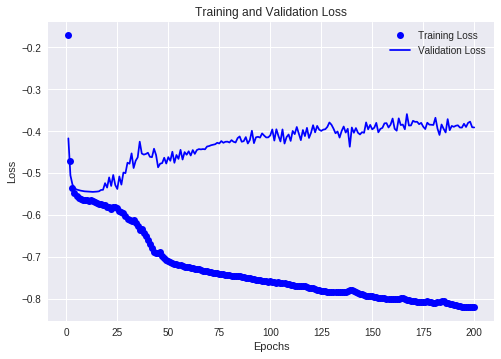

In [64]:
plt.plot(epochs,loss_values,'bo', label="Training Loss")
plt.plot(epochs,val_loss_values,'b',label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

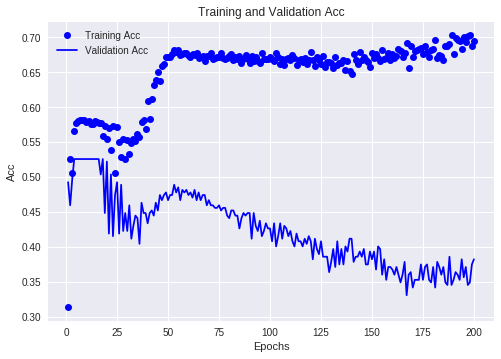

In [65]:
plt.plot(epochs,acc_values,'bo', label="Training Acc")
plt.plot(epochs,val_acc_values,'b',label="Validation Acc")
plt.title('Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [66]:
# Save model
model.save('drive/ml_apps/s2s_3L_chat.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/topology.py:2379: UserWarning: Layer lstm_4 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'lstm_1/while/Exit_2:0' shape=(?, 100) dtype=float32>, <tf.Tensor 'lstm_1/while/Exit_3:0' shape=(?, 100) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  str(node.arguments) + '. They will not be included '
/usr/local/lib/python3.6/dist-packages/keras/engine/topology.py:2379: UserWarning: Layer lstm_5 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'lstm_2/while/Exit_2:0' shape=(?, 100) dtype=float32>, <tf.Tensor 'lstm_2/while/Exit_3:0' shape=(?, 100) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  str(node.arguments) + '. They will not be included '
/usr/local/lib/python3.6/dist-packages/keras/engine/topology.py:2379: UserWarning: Layer lstm_

In [0]:
results = model.predict([encoder_input_data, decoder_input_data])

In [77]:
# Next: inference mode (sampling).
# Here's the drill:
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states

# Define sampling models
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h1 = Input(shape=(latent_dim,))
decoder_state_input_c1 = Input(shape=(latent_dim,))
decoder_state_input_h2 = Input(shape=(latent_dim,))
decoder_state_input_c2 = Input(shape=(latent_dim,))
decoder_state_input_h3 = Input(shape=(latent_dim,))
decoder_state_input_c3 = Input(shape=(latent_dim,))

decoder_states_inputs1 = [decoder_state_input_h1, decoder_state_input_c1]
decoder_states_inputs2 = [decoder_state_input_h2, decoder_state_input_c2]
decoder_states_inputs3 = [decoder_state_input_h3, decoder_state_input_c3]
#decoder_states_inputs = [decoder_states_inputs1,decoder_states_inputs2, decoder_states_inputs3 ]
decoder_states_inputs = [decoder_state_input_h1, decoder_state_input_c1,decoder_state_input_h2, decoder_state_input_c2,decoder_state_input_h3, decoder_state_input_c3]

dex_out = decoder_embedding(decoder_inputs)

decoder_outputs1, dstate_h1, dstate_c1 = decoder_lstm1(dex_out, initial_state=decoder_states_inputs[0:2])
decoder_outputs2, dstate_h2, dstate_c2 = decoder_lstm2(decoder_outputs1, initial_state=decoder_states_inputs[2:4])
decoder_outputs3, dstate_h3, dstate_c3 = decoder_lstm3(decoder_outputs2, initial_state=decoder_states_inputs[4:6])

decoder_states1 = [dstate_h1, dstate_c1]
decoder_states2 = [dstate_h2, dstate_c2]
decoder_states3 = [dstate_h1, dstate_c1]

decoder_states = [dstate_h1, dstate_c1, dstate_h2, dstate_c2, dstate_h3, dstate_c3]
# decoder_outputs2, dstate_h2, dstate_c2 = decoder_lstm2(decoder_outputs)
# decoder_states2 = [dstate_h2, dstate_c2]
#decoder_dense_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs3] + decoder_states)
#    [decoder_dense_outputs] + decoder_states)
decoder_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 100)    1000000     input_2[0][0]                    
__________________________________________________________________________________________________
input_15 (InputLayer)           (None, 100)          0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           (None, 100)          0                                            
__________________________________________________________________________________________________
lstm_4 (LS

In [93]:
encoder_model.save('drive/ml_apps/chat_encoder_3L_model.h5')
decoder_model.save('drive/ml_apps/chat_decoder_3L_model.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/topology.py:2379: UserWarning: Layer lstm_4 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'input_15:0' shape=(?, 100) dtype=float32>, <tf.Tensor 'input_16:0' shape=(?, 100) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  str(node.arguments) + '. They will not be included '
/usr/local/lib/python3.6/dist-packages/keras/engine/topology.py:2379: UserWarning: Layer lstm_5 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'input_17:0' shape=(?, 100) dtype=float32>, <tf.Tensor 'input_18:0' shape=(?, 100) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  str(node.arguments) + '. They will not be included '
/usr/local/lib/python3.6/dist-packages/keras/engine/topology.py:2379: UserWarning: Layer lstm_6 was passed non-serializable keyword argume

In [78]:
encoder_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
lstm_1 (LSTM)                [(None, None, 100), (None 80400     
_________________________________________________________________
lstm_2 (LSTM)                [(None, None, 100), (None 80400     
_________________________________________________________________
lstm_3 (LSTM)                [(None, None, 100), (None 80400     
Total params: 1,241,200
Trainable params: 241,200
Non-trainable params: 1,000,000
_________________________________________________________________


In [0]:
# # Reverse-lookup token index to decode sequences back to
# # something readable.
# reverse_input_word_index = dict(
#     (i, word) for word, i in input_token_index.items())
# reverse_target_word_index = dict(
#     (i, word) for word, i in target_token_index.items())

In [0]:
def word_seq(val_seq):
  x_val_sent=[]
  for i in range(len(val_seq)):
    x_val_sent.append(reverse_word_index[val_seq[i]]) 
  return x_val_sent

In [81]:
word_seq(encoder_input_data[9])

[' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '.',
 'good',
 'is',
 'that']

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    
    states_value = encoder_model.predict(input_seq)
    #print("states_value:", states_value)

    # Generate empty target sequence of length 1.
    
    target_seq = np.zeros((1,1))
    
    # Populate the first character of target sequence with the start character.
    
    #target_seq[0, 0] = target_token_index['bol']
    target_seq[0, 0] = vocab_token_index['bol']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    token_index = []
    #t = 1
    while not stop_condition:
    #for t in range(0,max_decoder_seq_length):
        
        output_tokens,h1,c1,h2,c2,h3,c3 = decoder_model.predict(
             [target_seq] + states_value)
        
        # Sample a token
        #print("shape output_tokens:", output_tokens.shape)
        #sampled_token_index = np.argmax(output_tokens[0, -1, :])
        output_word_embedding = np.reshape(output_tokens[0,-1,:],(1,latent_dim))
        sampled_similar = cosine_similarity(output_word_embedding,embedding_matrix)
        #print("Sampled similar:", sampled_similar.shape)
        sampled_token_index = np.argmax(sampled_similar)
                                           
        #sampled_word = reverse_target_word_index[sampled_token_index]
        sampled_word = reverse_word_index[sampled_token_index]
        
      

        if (sampled_word != 'eol'):
          decoded_sentence += sampled_word + ' '
          token_index.append(sampled_token_index)

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_word == 'eol' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index


        # Update states
        states_value = [h1, c1, h2,c2, h3,c3]
        
    return decoded_sentence

In [92]:
for seq_index in range(11,21):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index: seq_index+1]
    
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', texts[seq_index])
    print('Decoded sentence:', decoded_sentence)

-
Input sentence: See you later.
Decoded sentence: bye . 
-
Input sentence: Hello
Decoded sentence: hi 
-
Input sentence: Hi
Decoded sentence: how are you doing ? 
-
Input sentence: How are you doing?
Decoded sentence: i am doing well . 
-
Input sentence: I am doing well.
Decoded sentence: that is good to hear 
-
Input sentence: That is good to hear
Decoded sentence: yes it is . 
-
Input sentence: Yes it is.
Decoded sentence: know not so well you you 
-
Input sentence: Can I help you with anything?
Decoded sentence: yes . happy has one question . 
-
Input sentence: Yes, I have a question.
Decoded sentence: what is your question ? 
-
Input sentence: What is your question?
Decoded sentence: could you borrow the cup is sugar ? 


In [0]:
def prepare_text(input_text):
  tokens_in=[]
  input_data = np.zeros(
    (1,max_encoder_seq_length),
    dtype='float32')
  tokens_in = nltk.word_tokenize(input_text.lower())
  for i in range(len(tokens_in)):
    #print(tokens_in[i])
    if tokens_in[i] in input_words:
     
      input_data[0,i] = vocab_token_index[tokens_in[i]]
    else:
      input_data[0,i] = vocab_token_index['.']
  input_data = np.fliplr(input_data)
  return input_data

In [89]:
data = prepare_text("Hello")
print(data[0,], data.shape)

hello
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 127.] (1, 16)


In [90]:
new_sentence = decode_sequence(data)
print('-')
#print('Input sentence:', )
print('Decoded sentence:', new_sentence)

-
Decoded sentence: hi 


In [96]:
end_session = False
of = open('drive/ml_apps/user_input2.txt','a')
while not end_session:
    x = input("Enter >>");
    #print(">>", x)
    if x.lower() == "bye":
      print(">>", x)
      end_session = False
      of.close()
      break
    in_text = prepare_text(x)
    prediction =decode_sequence(in_text)
    print ("Response >>",prediction)
    fdbk = input("Is this response satisfactory? (Y/N)>>")
    if fdbk == "N":
      gd_response = input("Please enter expected response>>")
      output = x + ' \t ' + gd_response + '\n'
      of.write(output)

      
    

Enter >>Hello
Response >> hi 
Is this response satisfactory? (Y/N)>>Y
Enter >>How are you doing?
Response >> i am doing well . 
Is this response satisfactory? (Y/N)>>Y
Enter >>Can you help me?
Response >> know so now you is ? 
Is this response satisfactory? (Y/N)>>N
Please enter expected response>>I can try.
Enter >>I want to learn a language.
Response >> have you not if only do . 
Is this response satisfactory? (Y/N)>>N
Please enter expected response>>What language?
Enter >>Some programming language.
Response >> bye what . 
Is this response satisfactory? (Y/N)>>N
Please enter expected response>>Like python.
Enter >>Do you know python?
Response >> i 'm are better . 
Is this response satisfactory? (Y/N)>>N
Please enter expected response>>A little
Enter >>What about Java?
Response >> i what is to myself . 
Is this response satisfactory? (Y/N)>>N
Please enter expected response>>Not much really. 
Enter >>Do you like movies?
Response >> what of kind you ? 
Is this response satisfactory? (Y/